# Author: Faolán Hamilton
## Project Description: Analyse the planning applications submitted to Clare County Council over the past year 
### Source - https://planning.geohive.ie/datasets/housinggovie::irishplanningapplications/explore?layer=0&showTable=true

# Strategy
- Filter the dataset to only Clare County Council (>500,000 records down to 11,000)
- Filter the dataset to only the past year (2025 inclusive ~ 1,000)
- Filter out unneccessary headings 

## Clean-up
- Eircode out of address using regex
- Can I use commas  to determine a townland for address and group by settlement?

# Potential Questions:
- How many of the planning applications are granted?
- Determine a type for each (Residential, commercial etc.)
- Number of residential units 

In [1]:
#Modules to import 

import datetime as dt

# I had to pip install pandas
import pandas as pd

# I had to pip install matplotlib
import matplotlib.pyplot as plt

## Step 1: I went to the irish planning applications geohive website (https://planning.geohive.ie/datasets/housinggovie::irishplanningapplications/explore?filters=eyJQbGFubmluZ0F1dGhvcml0eSI6WyJDbGFyZSBDb3VudHkgQ291bmNpbCJdLCJSZWNlaXZlZERhdGUiOlsxNzM1Njg5NjAwMDAwLDI3MDQyMzM2MDAwMDBdfQ%3D%3D&layer=0&showTable=true) and filtered the +500,000 results to only show Clare County Council applications since 1/1/2025.

### Note - I repeated this step in the New Year to get a list from all of 2025

## Step 2: Download the results as a csv from the webiste.

## Step 3 - Upload the file to this project folder

In [2]:
df = pd.read_csv("ClareCoCo_PlanningApps_2025.csv")

In [3]:
headers = df.columns.tolist()
headers

['OBJECTID',
 'Planning Authority',
 'Application Number',
 'Development Description',
 'Development Address',
 'Development Postcode',
 'ITMEasting',
 'ITMNorthing',
 'Application Status',
 'Application Type',
 'Applicant Forename',
 'Applicant Surname',
 'Applicant Address',
 'Decision',
 'Land Use Code',
 'AreaofSite',
 'NumResidentialUnits',
 'One-Off House',
 'FloorArea',
 'ReceivedDate',
 'WithdrawnDate',
 'DecisionDate',
 'DecisionDueDate',
 'GrantDate',
 'ExpiryDate',
 'Appeal Reference Number',
 'Appeal Status',
 'Appeal Decision',
 'AppealDecisionDate',
 'AppealSubmittedDate',
 'FIRequestDate',
 'FIRecDate',
 'Link Application Details',
 'One-Off KPI',
 'ETL_DATE',
 'Site Id',
 'ORIG_FID',
 'x',
 'y']

In [4]:
#remove the headers that are not relevant
drop_col_list = ['OBJECTID','Planning Authority','ITMEasting','ITMNorthing','Applicant Forename','Applicant Surname','Applicant Address','WithdrawnDate','GrantDate','ExpiryDate','Appeal Reference Number','AppealSubmittedDate','FIRequestDate','FIRecDate', 'Appeal Status', 'Site Id', 'ETL_DATE', 'ORIG_FID']
df.drop(columns=drop_col_list, inplace=True)
df.head(1)

,Application Number,Development Description,Development Address,Development Postcode,Application Status,Application Type,Decision,Land Use Code,AreaofSite,NumResidentialUnits,...,FloorArea,ReceivedDate,DecisionDate,DecisionDueDate,Appeal Decision,AppealDecisionDate,Link Application Details,One-Off KPI,x,y
0,2552,"to construct dwelling house, shared entrance, ...","Drumullan , Kilmurry , Sixmilebridge Co Clare",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,NaN,NaN,1,...,138.12,2/27/2025 12:00:00 AM,7/8/2025 12:00:00 AM,7/8/2025 12:00:00 AM,NaN,NaN,http://www.eplanning.ie/ClareCC/AppFileRefDeta...,No,-979920.603746,6.943238e+06


In [5]:
df['ReceivedDate']

0        2/27/2025 12:00:00 AM
1        2/28/2025 12:00:00 AM
2        2/24/2025 12:00:00 AM
3        2/26/2025 12:00:00 AM
4        2/27/2025 12:00:00 AM
                 ...          
1168    12/18/2025 12:00:00 AM
1169    12/18/2025 12:00:00 AM
1170    12/18/2025 12:00:00 AM
1171    12/18/2025 12:00:00 AM
1172    12/18/2025 12:00:00 AM
Name: ReceivedDate, Length: 1173, dtype: object

In [6]:
#https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#https://sqlpey.com/python/solved-how-to-change-the-datetime-format-in-pandas/
received_dateformat = pd.to_datetime(df.ReceivedDate)
received_dateformat.dt.strftime('%d/%m/%Y')

/tmp/ipykernel_32840/2063671229.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  received_dateformat = pd.to_datetime(df.ReceivedDate)


0       27/02/2025
1       28/02/2025
2       24/02/2025
3       26/02/2025
4       27/02/2025
           ...    
1168    18/12/2025
1169    18/12/2025
1170    18/12/2025
1171    18/12/2025
1172    18/12/2025
Name: ReceivedDate, Length: 1173, dtype: object

----------------------------

### I want to get all unique values in the 'Application Type' column, as I know form my urban planning degree that not all applications are larger scale building development/even new applications

In [14]:
# I want to determine the count of the unique values in the 'Application Types' column.
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

application_types = df['Application Type'].value_counts()
print("Value counts in Application Type:\n",application_types);

Value counts in Application Type:
 Application Type
PERMISSION               921
RETENTION                192
OUTLINE PERMISSION        30
PERMISSION CONSEQUENT     17
EXTENSION OF DURATION     13
Name: count, dtype: int64


### I tried to as the CoPilot to define all five categories, but found they were giving me dud sources and not reliable ones. Instead I used two sources from Clare County Council to define the five categories above in layman's terms

##### Here is the Co-Pilot conversation that lead me to go a different direction (manually looking at Clare County Council's website) https://copilot.microsoft.com/shares/yEspVqnVx13PxU259G9ku

Source for extension of duration: https://www.clarecoco.ie/services/planning/applications/permission-durations/

Source: https://mylittlehome.ie/clare-county-council-planning-permission-faqs/#What_Are_the_Main_Types_of_Planning_Permission:~:text=The%20Irish%20Times-,What%20Are%20the%20Main%20Types%20of%20Planning%20Permission%3F,-Full%20Permission%0AThe

Types of Planning Applications:
- Permission - The standard application for building a new dwelling, extension, or major alteration which is valid for five years

- Retention Permission - Required where works have already been carried out without prior approval.

- Outline Permission - Used to establish whether a proposal is acceptable in principle before submitting detailed plans. If granted, a subsequent full application must follow within 3 years.

- Permission Consequent to Outline - The full application that follows the initial outline permission above.

- Extension of Duration - Extend the appropriate period of a planning permission. In certain circumstances, the planning authority may extend the life of a planning permission. 

--------------------------------------------

## Decisions

In [ ]:
# Fill NaN value with 'NOT YET DECIDED'
df['Decision'] = df['Decision'].fillna('NOT YET DECIDED')

In [12]:
# I also need to determine the outcome of the applications that have decisions 
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

decision = df['Decision'].value_counts()
print("Value counts in Decisions:\n",decision);

Value counts in Decisions:
 Decision
CONDITIONAL        709
NOT YET DECIDED    399
REFUSED             52
UNCONDITIONAL       13
Name: count, dtype: int64


In [21]:
decision_types = decision.index
decision_types

Index(['CONDITIONAL', 'NOT YET DECIDED', 'REFUSED', 'UNCONDITIONAL'], dtype='object', name='Decision')

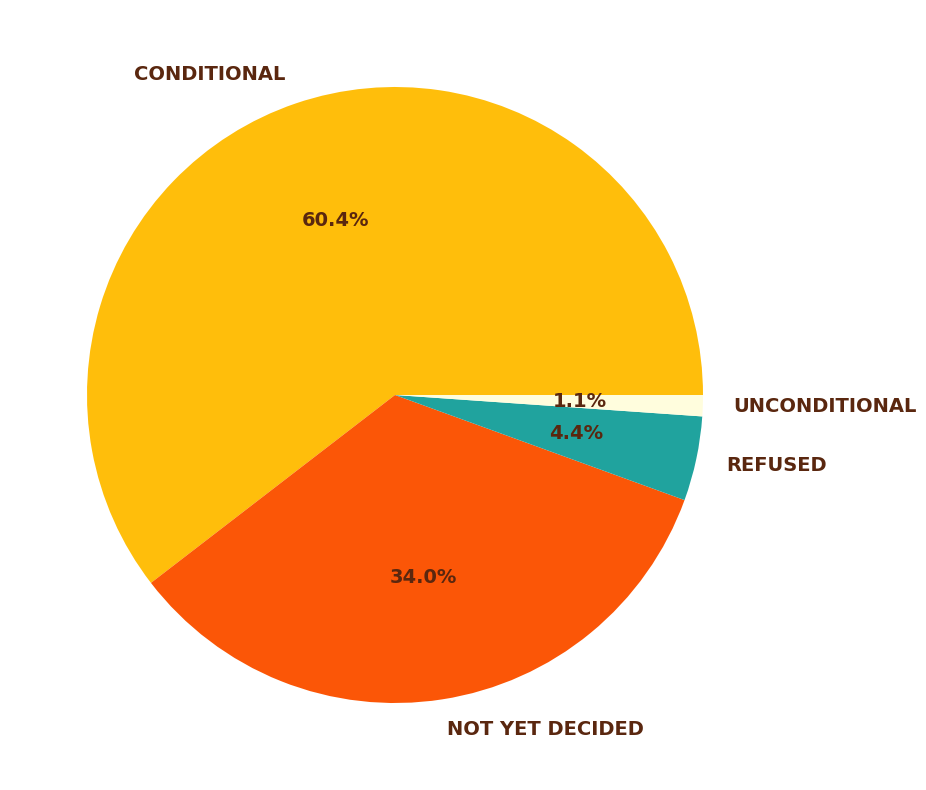

In [ ]:
# Source - https://www.geeksforgeeks.org/data-science/plot-a-pie-chart-in-python-using-matplotlib/
# Source -  https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
fig = plt.figure (figsize = (10, 10 ))

# The below source was incredibly useful to help me to figure out plot label sizing
# Source - https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart


# The values are plotted, then labelled outside and the percentage of each wedge is listed
plt.pie(decision, labels = decision_types,textprops={'fontsize': 14, 'color' : '#5a270f', 'weight':'bold'}, autopct='%1.1f%%', colors =['#a6d96a', '#fb5607','#20a39e', '#fffddd'])


plt.show()

--------------------------------------------------

In [10]:
# The sum of Residential units applied for 
x = sum(df['NumResidentialUnits'])
print (f"The number of residential units applied for in County Clare in 2025 is {x:,}")

The number of residential units applied for in County Clare in 2025 is 1,689


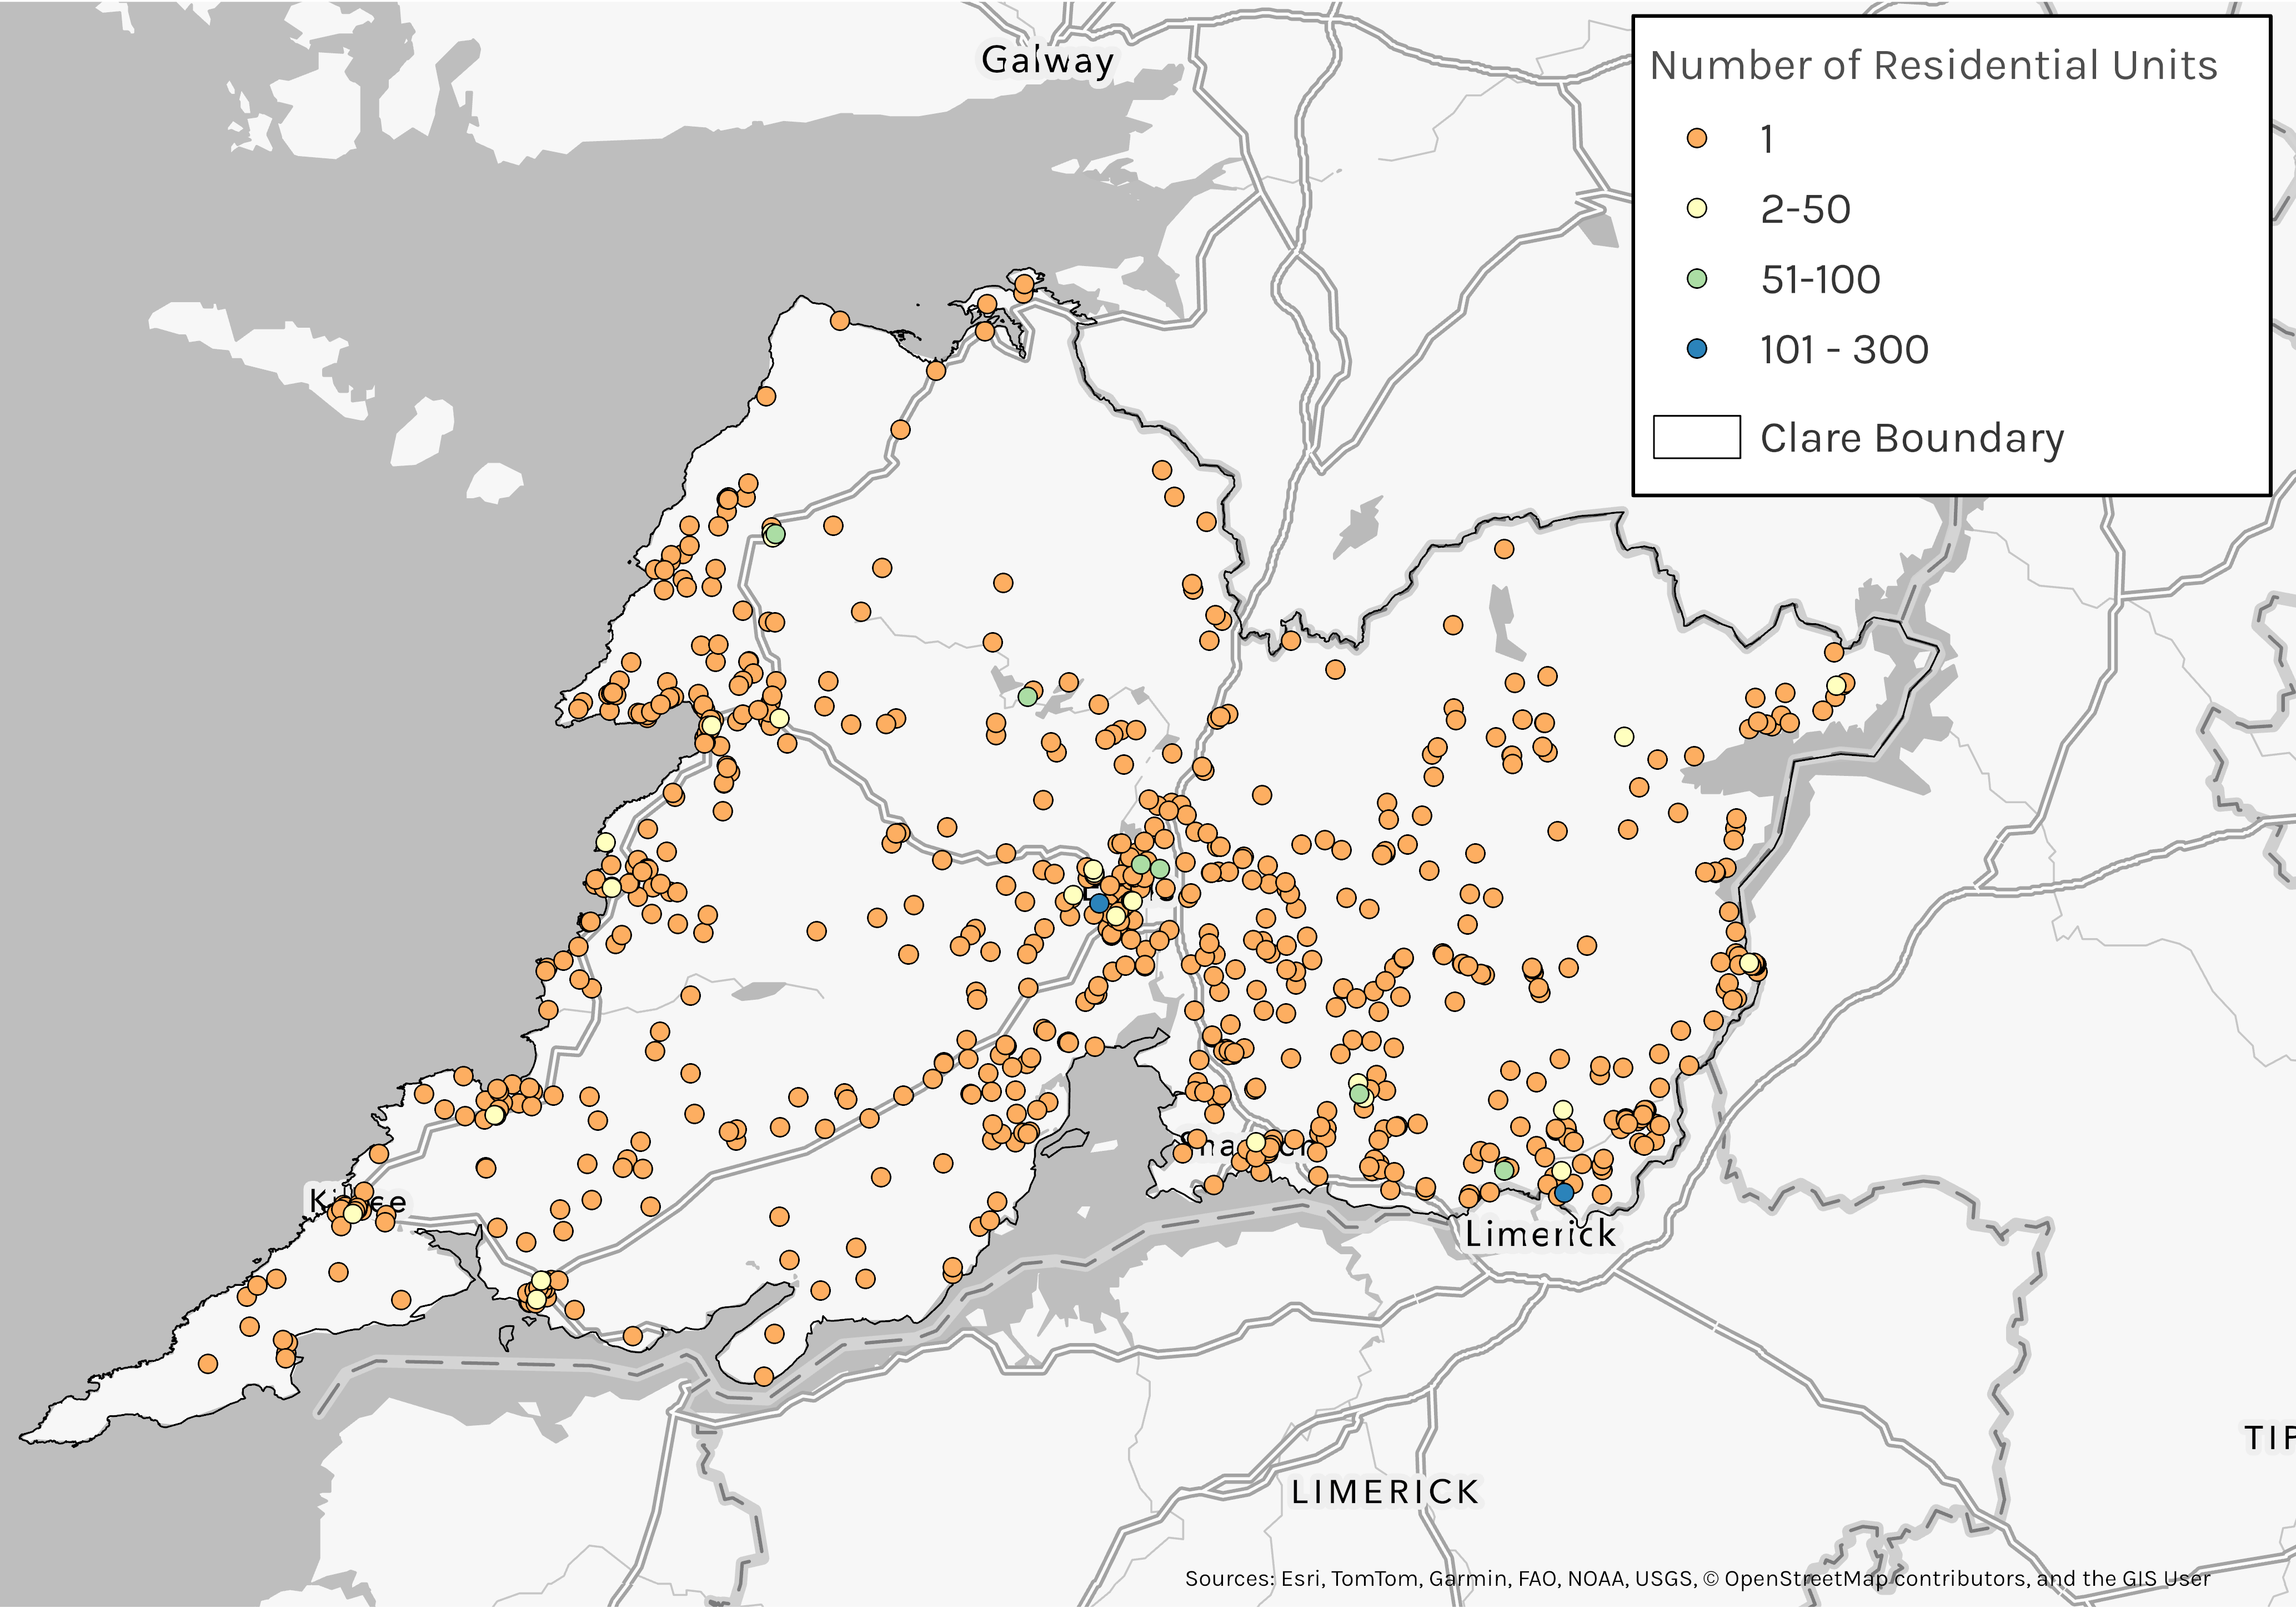

### The End